In [ ]:
import pandas as pd
df = pd.read_csv('/content/Loan Approval Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df1 = df.drop('Loan_ID' , axis='columns')
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df2 = df1.dropna()
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df2.shape

(480, 12)

In [ ]:
df2['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
df2['Dependents'] = df2['Dependents'].apply(lambda x : x if x in ['0','1','2'] else '3')

<ipython-input-142-cef029f0728c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dependents'] = df2['Dependents'].apply(lambda x : x if x in ['0','1','2'] else '3')


In [ ]:
df2['Dependents'].unique()

array(['1', '0', '2', '3'], dtype=object)

In [ ]:
df2['Dependents'] = df2['Dependents'].astype(int)

<ipython-input-144-d31d02121367>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dependents'] = df2['Dependents'].astype(int)


In [ ]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df2.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
dfg = pd.get_dummies(df2['Gender'])
dfm = pd.get_dummies(df2['Married'])
dfe = pd.get_dummies(df2['Education'])
dfs = pd.get_dummies(df2['Self_Employed'])
dfp = pd.get_dummies(df2['Property_Area'])

In [ ]:
df3 = pd.concat((df2,dfg,dfm,dfe,dfs,dfp) , axis='columns')
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,1,0,1,1,0,1,0,1,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,1,0,1,1,0,0,1,0,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,1,0,1,0,1,1,0,0,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,1,1,0,1,0,1,0,0,0,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,...,1,0,1,1,0,0,1,0,0,1


In [ ]:
df4 = df3.drop(['Gender','Married','Education','Self_Employed','Property_Area'] , axis='columns')
df4.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
1,1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1


In [ ]:
df4['Loan_Status'] = df4['Loan_Status'].map({'N':0 , 'Y':1})

In [ ]:
X = df4.drop('Loan_Status' , axis = 'columns')
Y = df4['Loan_Status']

In [ ]:
Y.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

**Over Sampling to fix biased Data**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
res = RandomOverSampler()

Xres,Yres = res.fit_resample(X,Y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xres,Yres,random_state=90)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(xtrain,ytrain)

print(model1.score(xtrain,ytrain))
print(model1.score(xtest,ytest))

1.0
0.927710843373494


In [ ]:
train_accuracy = []
test_accuracy = []

for k in range(0,100):
  xtrain,xtest,ytrain,ytest = train_test_split(Xres,Yres,random_state=k)
  model2 = DecisionTreeClassifier()
  model2.fit(xtrain,ytrain)

  train_accuracy.append(model2.score(xtrain,ytrain))
  test_accuracy.append(model2.score(xtest,ytest))

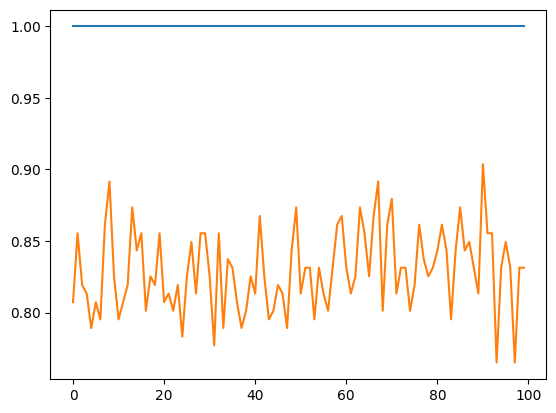

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.show()

In [ ]:

import numpy as np
print(np.array(test_accuracy).max())
print(np.array(test_accuracy).argmax())

0.9036144578313253
90


**Tune Limiting Criteria of Decision tree Classifier to avoid overfitting**

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(Xres,Yres,random_state=90)

# Scaling of Data
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

scl.fit(xtrain)             #scale down all the features value between 0 to 1

xtrainS = scl.transform(xtrain)
xtestS = scl.transform(xtest)

#model3 = DecisionTreeClassifier(max_depth=4)
#model3 = DecisionTreeClassifier(max_leaf_nodes=5)
model3 = DecisionTreeClassifier(max_depth=15)
model3.fit(xtrainS,ytrain)

print(model3.score(xtrainS,ytrain))
print(model3.score(xtestS,ytest))

0.9698795180722891
0.9096385542168675


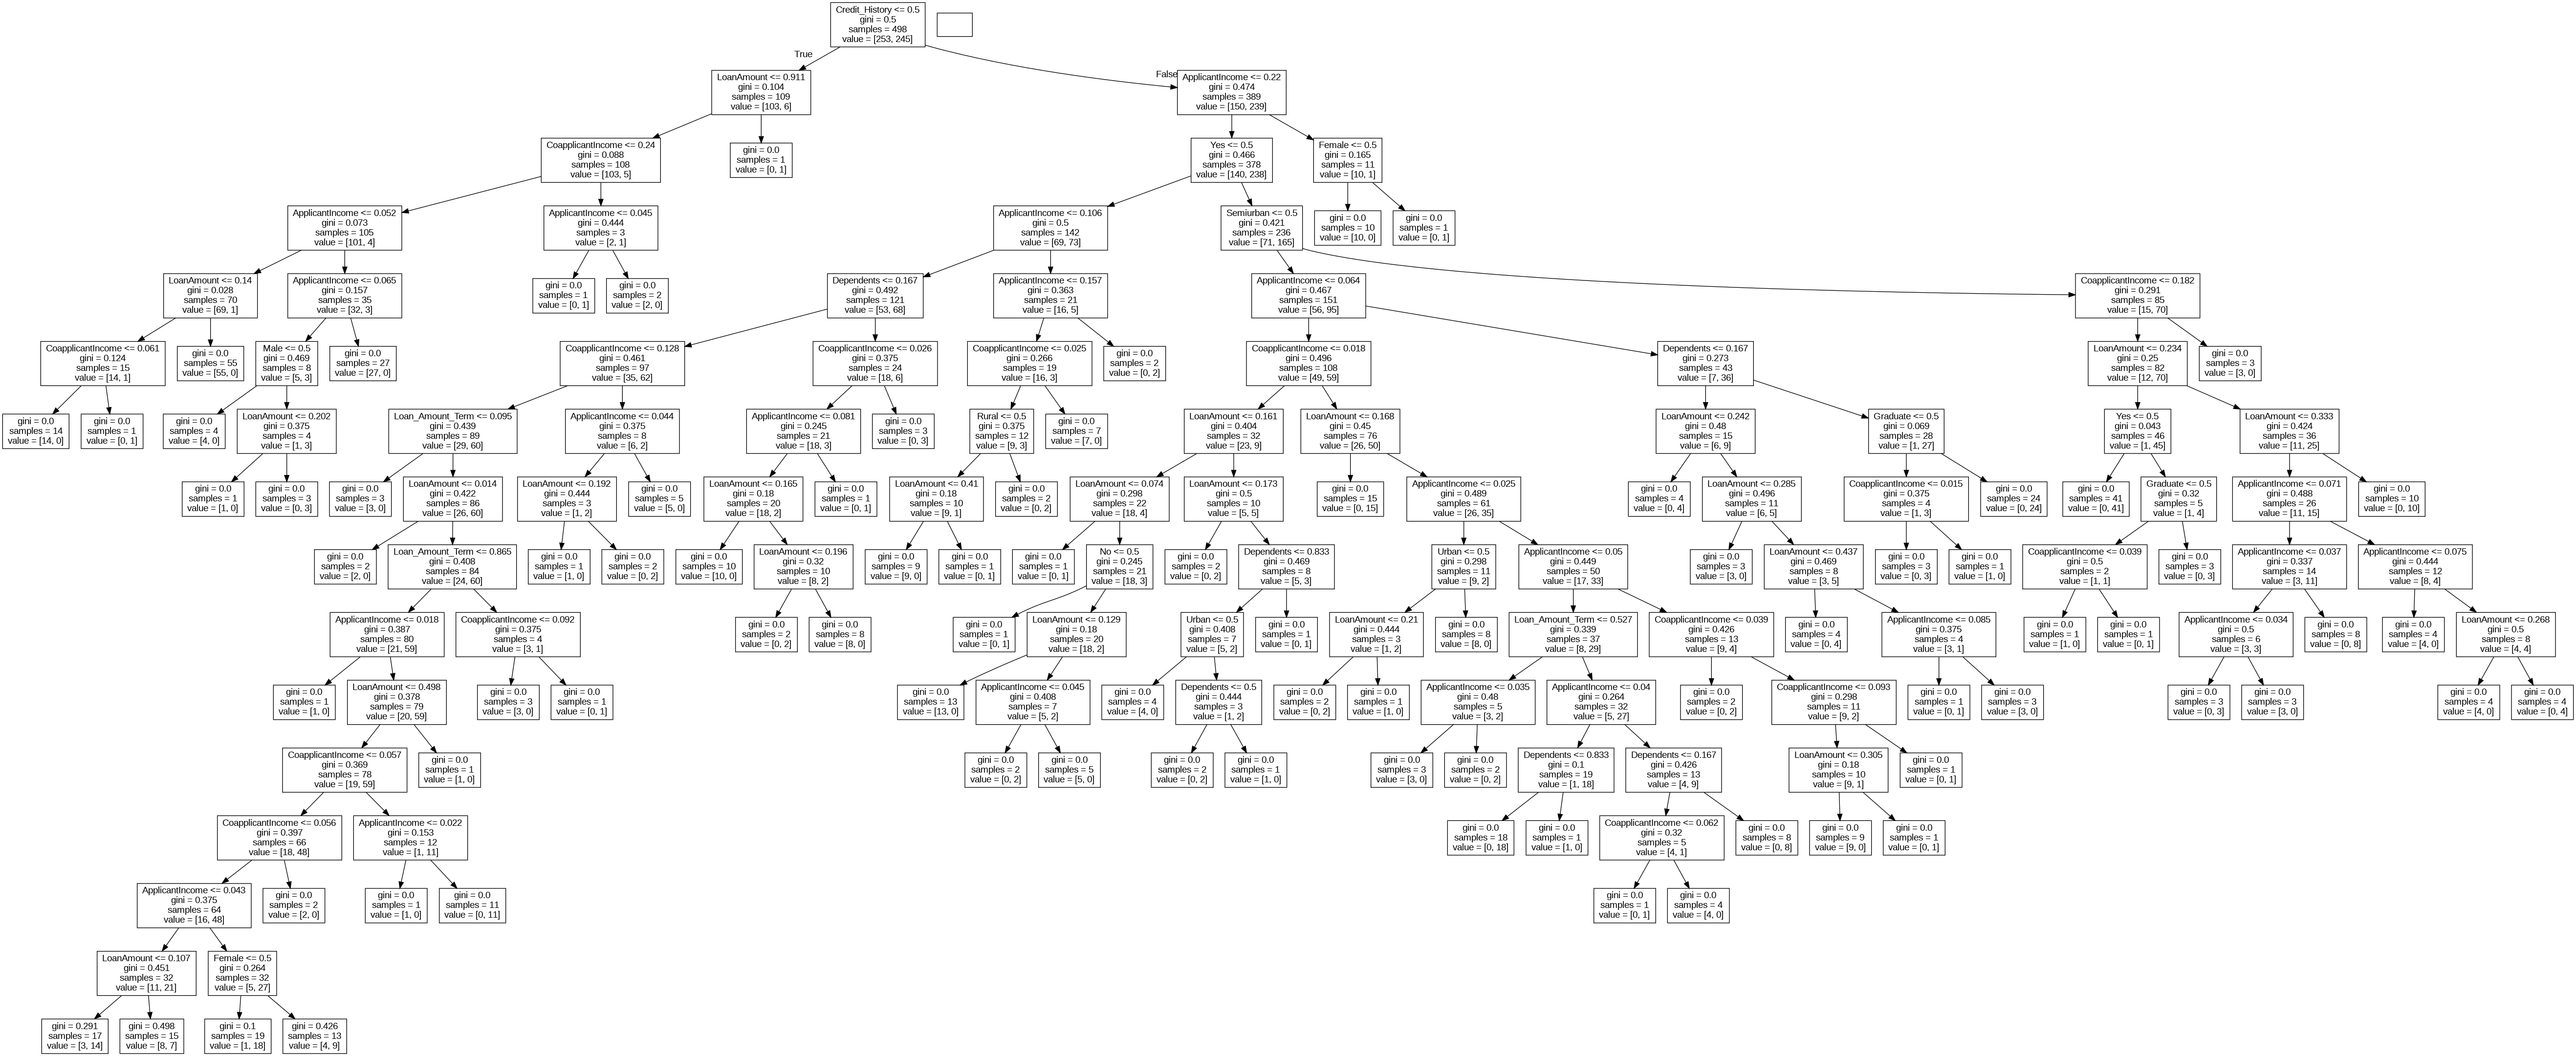

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(model3,feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytrain,model3.predict(xtrainS))

array([[245,   8],
       [  7, 238]])

In [ ]:
confusion_matrix(ytest,model3.predict(xtestS))

array([[75,  4],
       [11, 76]])

#Random Forest Classifier
* Create multiple decision tress and use prediction made by majority of tress as final predicted value

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(Xres,Yres,random_state=90)

# Scaling of Data
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()

scl.fit(xtrain)             #scale down all the features value between 0 to 1

xtrainS = scl.transform(xtrain)
xtestS = scl.transform(xtest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#rmodel = RandomForestClassifier(max_depth=8)
#rmodel = RandomForestClassifier(max_depth=9)
rmodel = RandomForestClassifier(n_estimators = 70)

rmodel.fit(xtrainS,ytrain)

RandomForestClassifier(n_estimators=70)

In [ ]:
print(rmodel.score(xtrainS,ytrain))
print(rmodel.score(xtestS,ytest))

1.0
0.8975903614457831


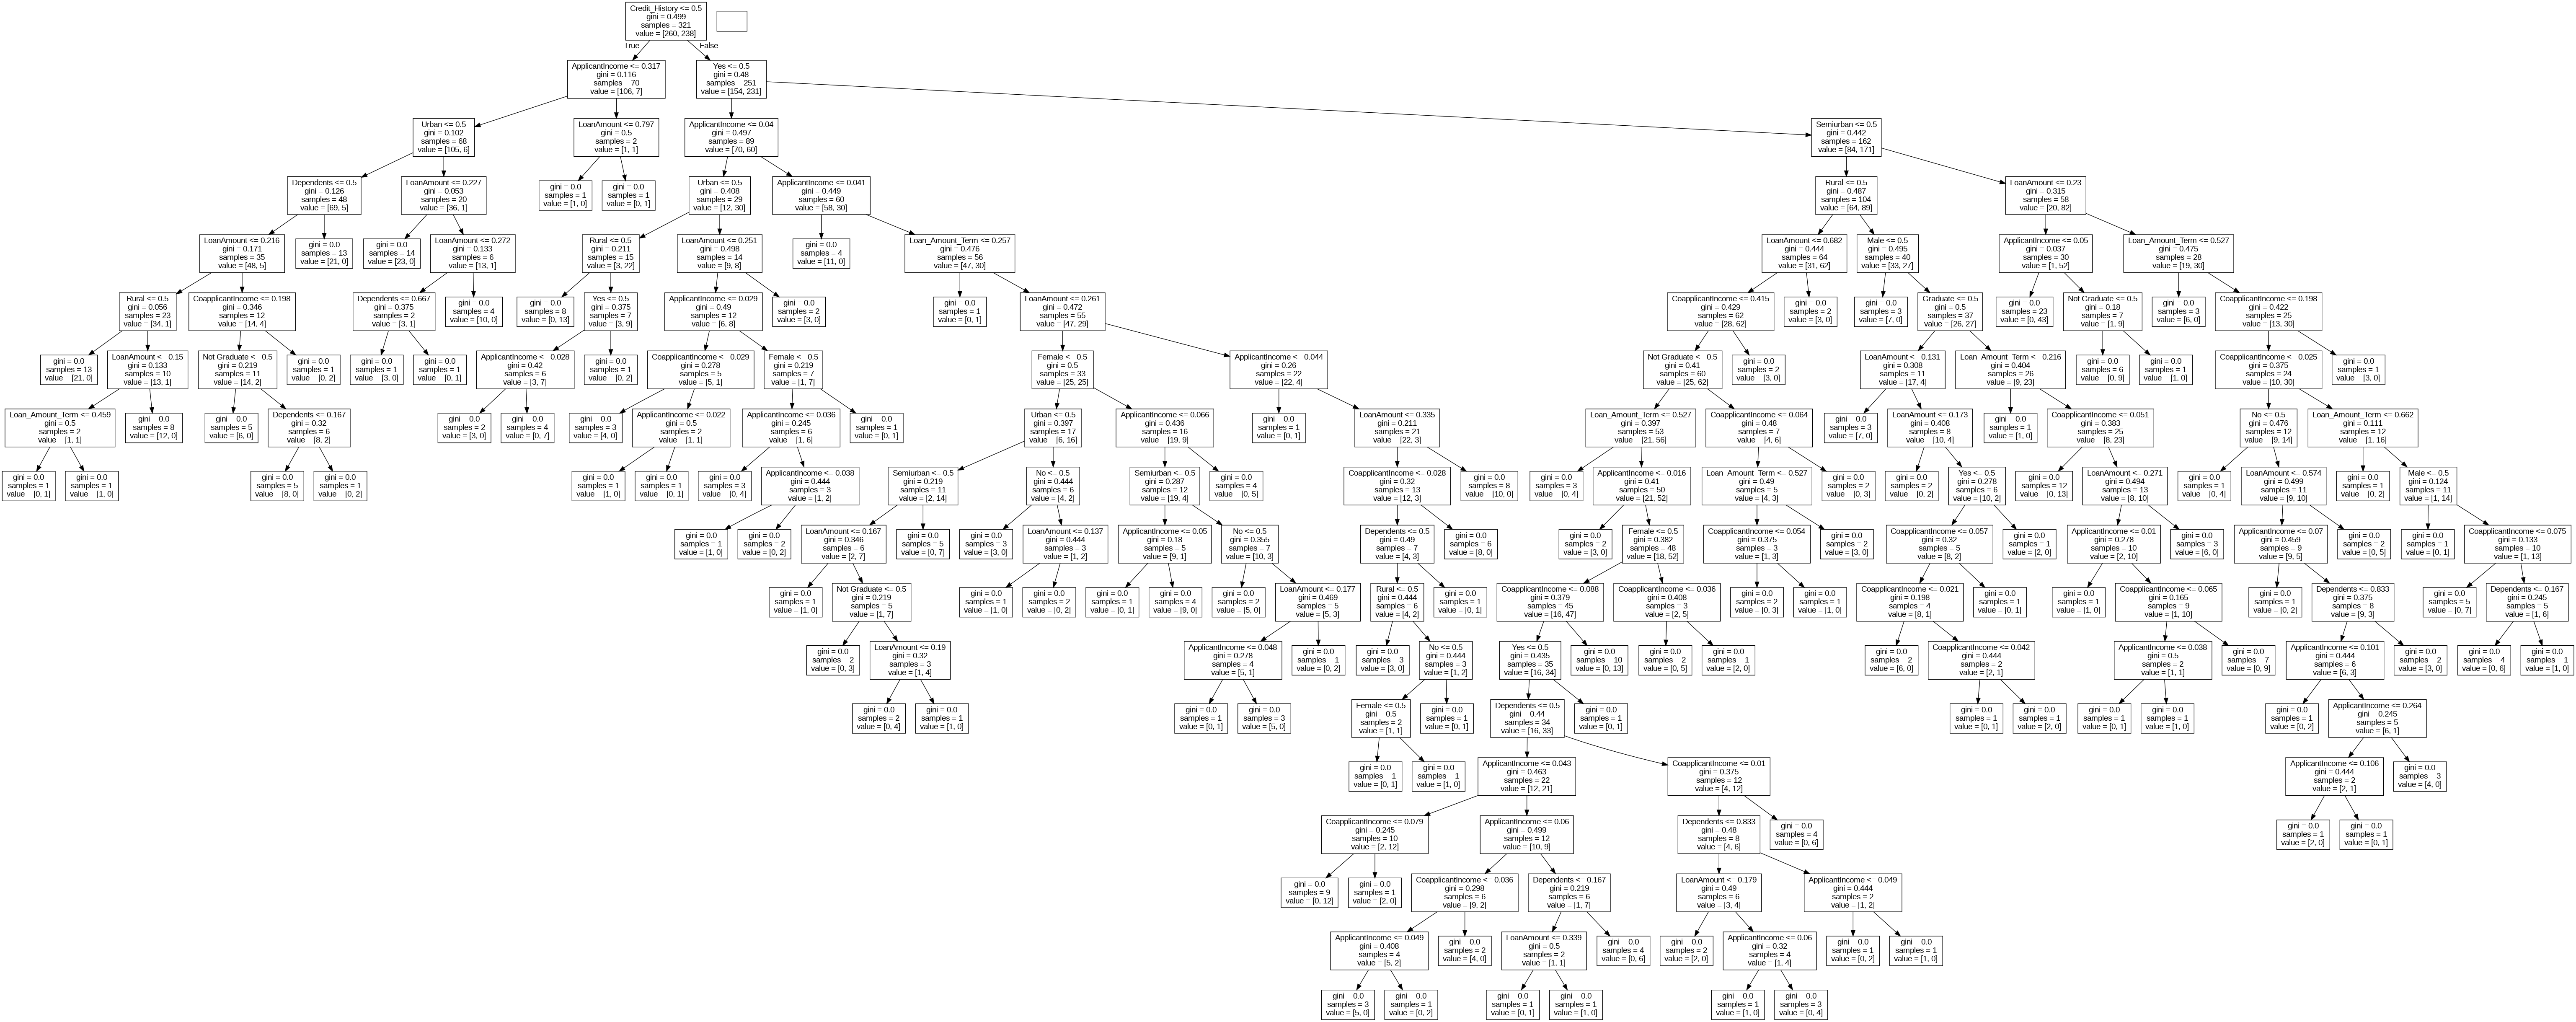

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(rmodel[0],feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

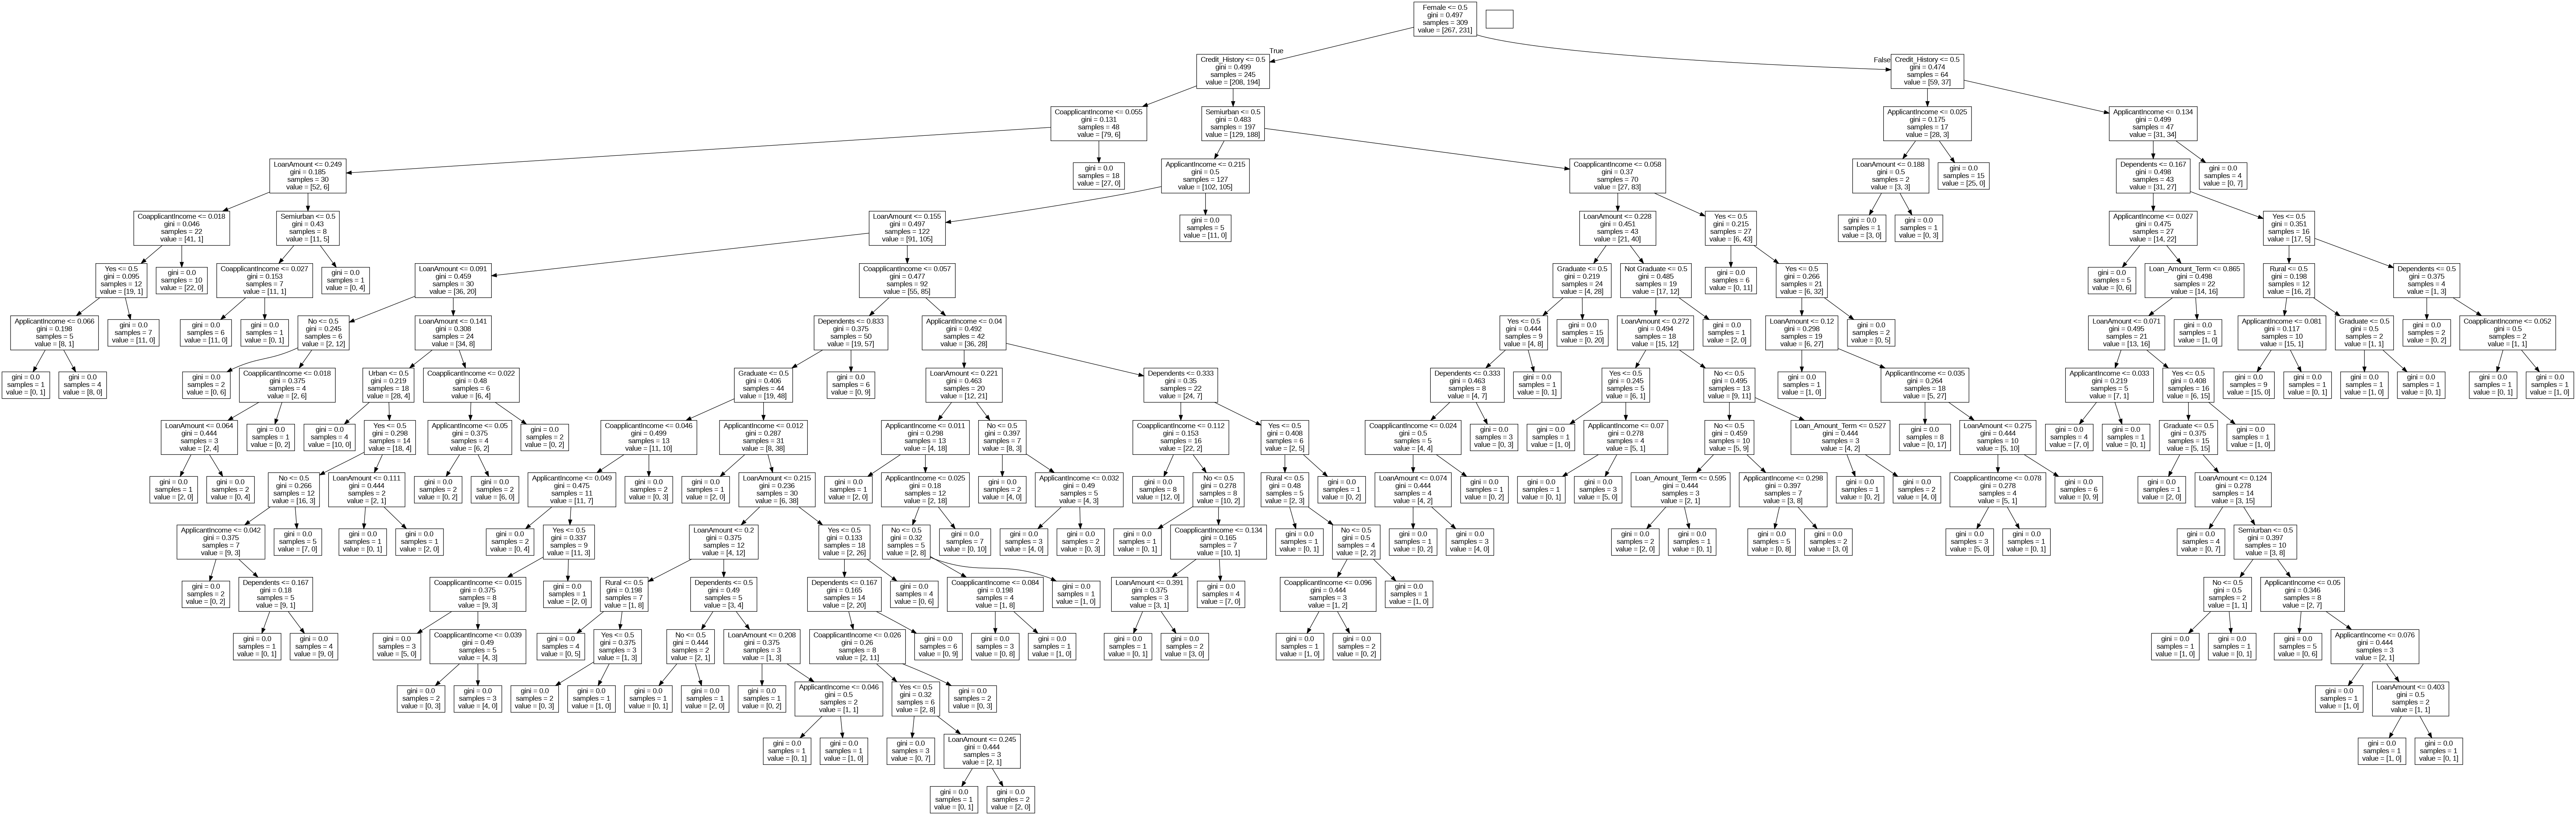

In [ ]:
dot_data = export_graphviz(rmodel[1],feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

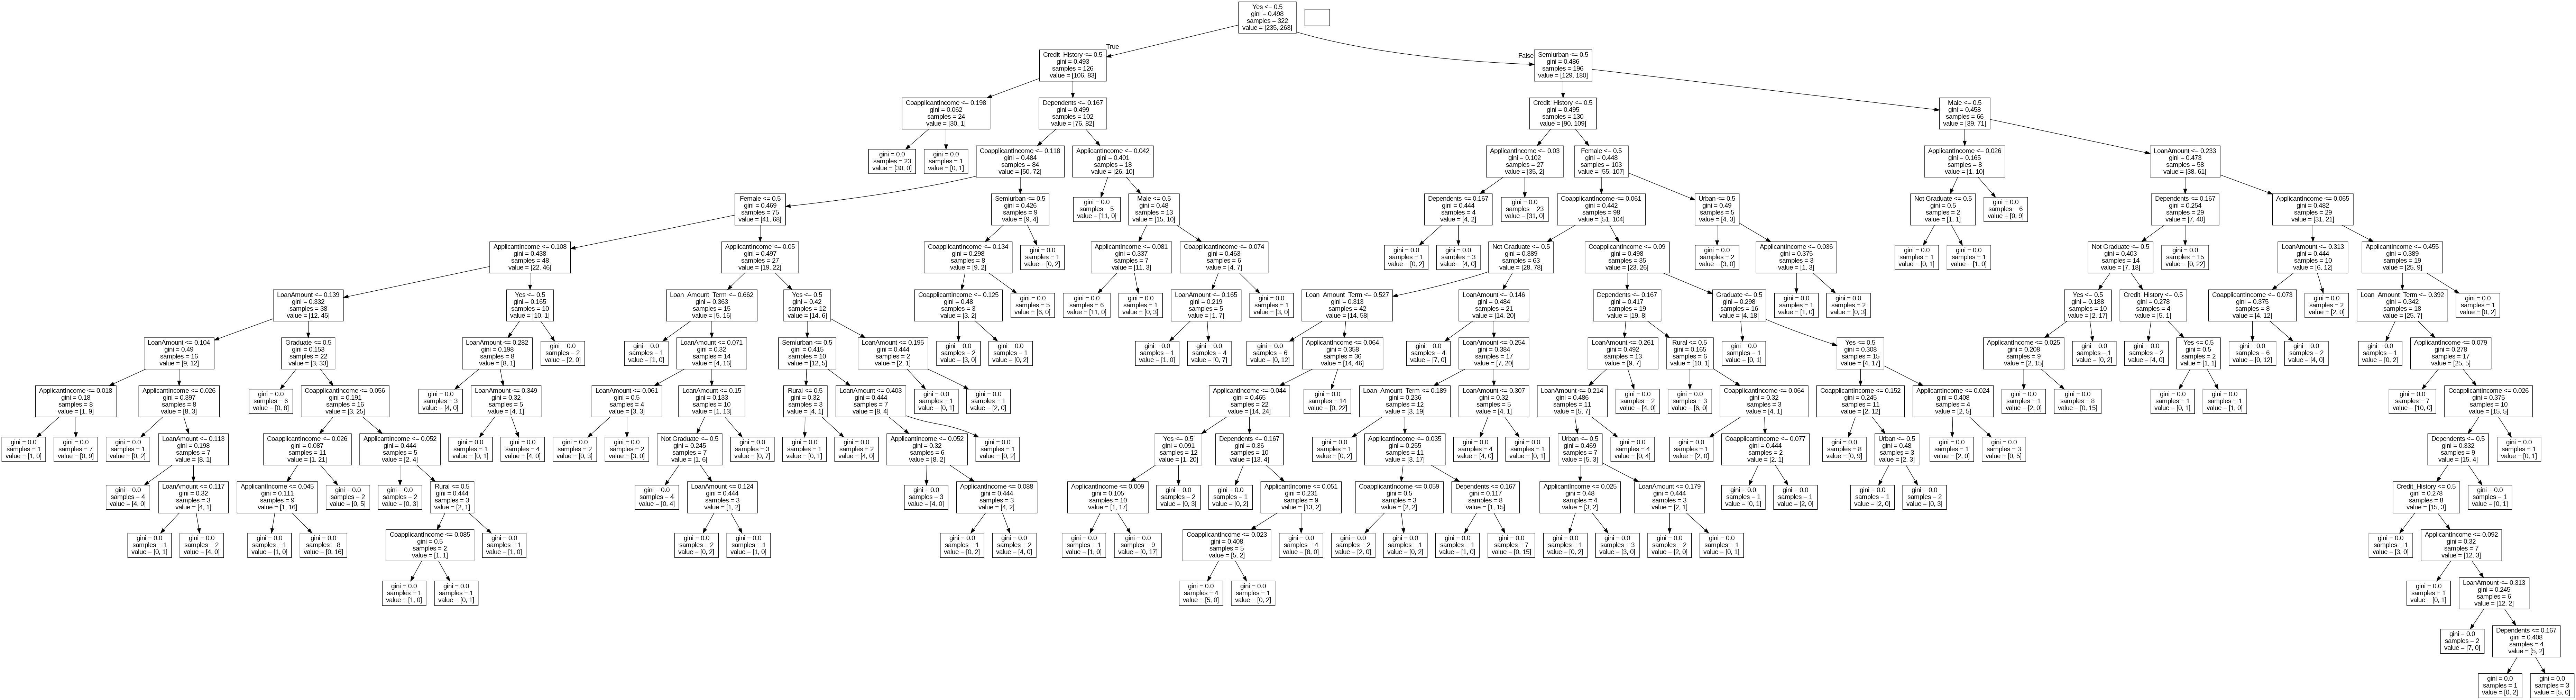

In [ ]:
dot_data = export_graphviz(rmodel[69],feature_names=xtrain.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
tr_acc = []
ts_acc = []
for k in range(2,21):
  rmodel = RandomForestClassifier(max_depth=k , max_leaf_nodes=23)

  rmodel.fit(xtrainS,ytrain)
  tr_acc.append(rmodel.score(xtrainS,ytrain))
  ts_acc.append(rmodel.score(xtestS,ytest))

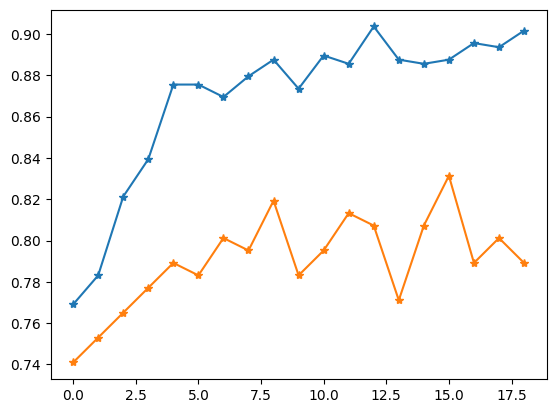

In [ ]:
plt.plot(tr_acc , marker = '*')
plt.plot(ts_acc , marker = '*')
plt.show()

In [ ]:
confusion_matrix(ytrain,rmodel.predict(xtrainS))

array([[181,  72],
       [ 52, 193]])

In [ ]:
confusion_matrix(ytest,rmodel.predict(xtestS))

array([[54, 25],
       [21, 66]])

**Apply Logistic Regression & K Neighbors cLssifier to compare the result with respect to Decision Tree classifier and Random Forest Classifier**